In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#cleaning data
df = pd.read_csv('All Fitbit Data.csv', index_col=0, parse_dates=True)
df.columns = df.iloc[0]
df = df.iloc[1:]
df['Calories Burned'] = [col.replace(',', '') for col in df['Calories Burned']]
df['Steps'] = [col.replace(',', '') for col in df['Steps']]
df['Activity Calories'] = [col.replace(',', '') for col in df['Activity Calories']]
df['Minutes Sedentary'] = [col.replace(',', '') for col in df['Minutes Sedentary']]
df = df.apply(pd.to_numeric)
df.head()
#change values from strings to ints and remove commas

Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Activities,,,,,,,,,
8/1/18,2223,14862,6.29,25,702,271,65,8,1157
8/2/18,2606,21262,10.35,19,793,210,68,78,1537
8/3/18,2951,28019,11.86,28,310,437,123,22,2114
8/4/18,2212,15573,6.59,13,694,198,85,18,1138
8/5/18,2093,13197,5.58,25,637,206,59,13,987


In [68]:
df.describe()
#brief overview of data

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Day of Week (Num),Is_Weekend,Is_Weekday
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,2408.490476,19070.504762,8.512905,47.516667,597.716667,244.680952,61.573810,47.209524,1362.030952,3.007143,0.285714,0.714286
std,366.138852,6833.919678,3.343953,32.301935,120.586032,75.541849,41.453045,33.981589,421.716417,2.000584,0.452293,0.452293
min,1729.000000,5736.000000,2.430000,0.000000,304.000000,96.000000,0.000000,0.000000,554.000000,0.000000,0.000000,0.000000
25%,2147.000000,13966.500000,5.970000,27.000000,519.750000,188.750000,33.000000,20.750000,1033.000000,1.000000,0.000000,0.000000
50%,2322.500000,17788.500000,7.785000,43.000000,599.000000,232.000000,51.000000,40.000000,1279.500000,3.000000,0.000000,1.000000
75%,2652.250000,23256.000000,10.645000,61.000000,676.000000,284.500000,82.000000,66.000000,1660.000000,5.000000,1.000000,1.000000
max,4683.000000,44446.000000,22.000000,258.000000,1049.000000,498.000000,237.000000,207.000000,2937.000000,6.000000,1.000000,1.000000


In [4]:
df.columns.name = ""
df = df.reset_index().rename(columns = {"Activities": "Date"})
df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,8/1/18,2223,14862,6.29,25,702,271,65,8,1157
1,8/2/18,2606,21262,10.35,19,793,210,68,78,1537
2,8/3/18,2951,28019,11.86,28,310,437,123,22,2114
3,8/4/18,2212,15573,6.59,13,694,198,85,18,1138
4,8/5/18,2093,13197,5.58,25,637,206,59,13,987


In [5]:
import datetime
import calendar

def fix_date_syntax(raw_date): 
    date = raw_date.split('/')  #split raw date into a list of strings
    
    date[2] = '20' + date[2]    #need to fix date syntax
    if len(date[0]) == 1:       #changes dates to mm-dd-yyyy format in order to use .weekday()
        date[0] = '0' + date[0]
    if len(date[1]) == 1:
        date[1] = '0' + date[1]
    date = '-'.join(date)
    return date
def day_num(date):
    return datetime.datetime.strptime(date, '%m-%d-%Y').weekday() # returns day of week as a number
def day_str(date):
    return datetime.datetime.strptime(date, '%m-%d-%Y').strftime('%a') #returns shortened string of day
def month(date):
    return datetime.datetime.strptime(date, '%m-%d-%Y').strftime('%b')

In [6]:
df["Date"] = df["Date"].apply(fix_date_syntax)

In [7]:
df["Day of Week (Num)"] = df["Date"].apply(day_num)
#0-Sunday, 1-Monday, etc
df['Day'] = df['Date'].apply(day_str)
df['Month'] = df['Date'].apply(month)

In [8]:
df

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Day of Week (Num),Day,Month
0,08-01-2018,2223,14862,6.29,25,702,271,65,8,1157,2,Wed,Aug
1,08-02-2018,2606,21262,10.35,19,793,210,68,78,1537,3,Thu,Aug
2,08-03-2018,2951,28019,11.86,28,310,437,123,22,2114,4,Fri,Aug
3,08-04-2018,2212,15573,6.59,13,694,198,85,18,1138,5,Sat,Aug
4,08-05-2018,2093,13197,5.58,25,637,206,59,13,987,6,Sun,Aug
5,08-06-2018,2485,19756,8.36,30,578,275,77,31,1464,0,Mon,Aug
6,08-07-2018,2232,11833,5.01,10,850,323,52,4,1191,1,Tue,Aug
7,08-08-2018,2478,20241,8.57,30,483,206,112,44,1450,2,Wed,Aug
8,08-09-2018,3087,30974,13.11,34,576,492,123,24,2311,3,Thu,Aug
9,08-10-2018,1899,9654,4.08,16,995,216,23,0,767,4,Fri,Aug


In [69]:
#splitting between weekday and weekend
def is_weekend(day):
    if (day == 0) or (day == 6):
        return 1
    else:
        return 0
def is_weekday(day):
    if (day == 0) or (day == 6):
        return 0
    else:
        return 1

In [10]:
df["Is_Weekend"] = df["Day of Week (Num)"].apply(is_weekend)
df["Is_Weekday"] = df["Day of Week (Num)"].apply(is_weekday)

In [70]:
#sorting records in chronological order
df = df.sort_values("Date", ascending = False)
df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Day of Week (Num),Day,Month,Is_Weekend,Is_Weekday
152,12-31-2017,3081,18965,8.13,12,800,348,76,20,1503,6,Sun,Dec,1,0
151,12-30-2017,2397,17800,8.43,45,525,316,25,42,1384,5,Sat,Dec,0,1
150,12-29-2017,2464,17627,7.46,63,763,380,41,21,1500,4,Fri,Dec,0,1
149,12-28-2017,2094,11593,4.91,12,608,307,2,3,1017,3,Thu,Dec,0,1
148,12-27-2017,2266,13747,5.82,40,662,297,22,13,1208,2,Wed,Dec,0,1


In [71]:
#max calories, distance traveled, steps in 1 day; including what date it happens on
def max_features(df):
    cb = df['Calories Burned'].max()
    step = df['Steps'].max()
    dist = df['Distance'].max()
    floors = df['Floors'].max()
    sed = df['Minutes Sedentary'].max()
    actcal = df['Activity Calories'].max()
    d = {"Max Calories": cb, "Max Steps": step, "Max Distance": dist, "Max Floors":floors, "Max Min Sedentary":sed, "Max Activity Calories": actcal}
    return pd.DataFrame(data = d, index = ["Values"])

In [13]:
max_features(df)

,Max Calories,Max Steps,Max Distance,Max Floors,Max Min Sedentary,Max Activity Calories
Values,4683,44446,22.0,258,1049,2937


## Correlation of all Features

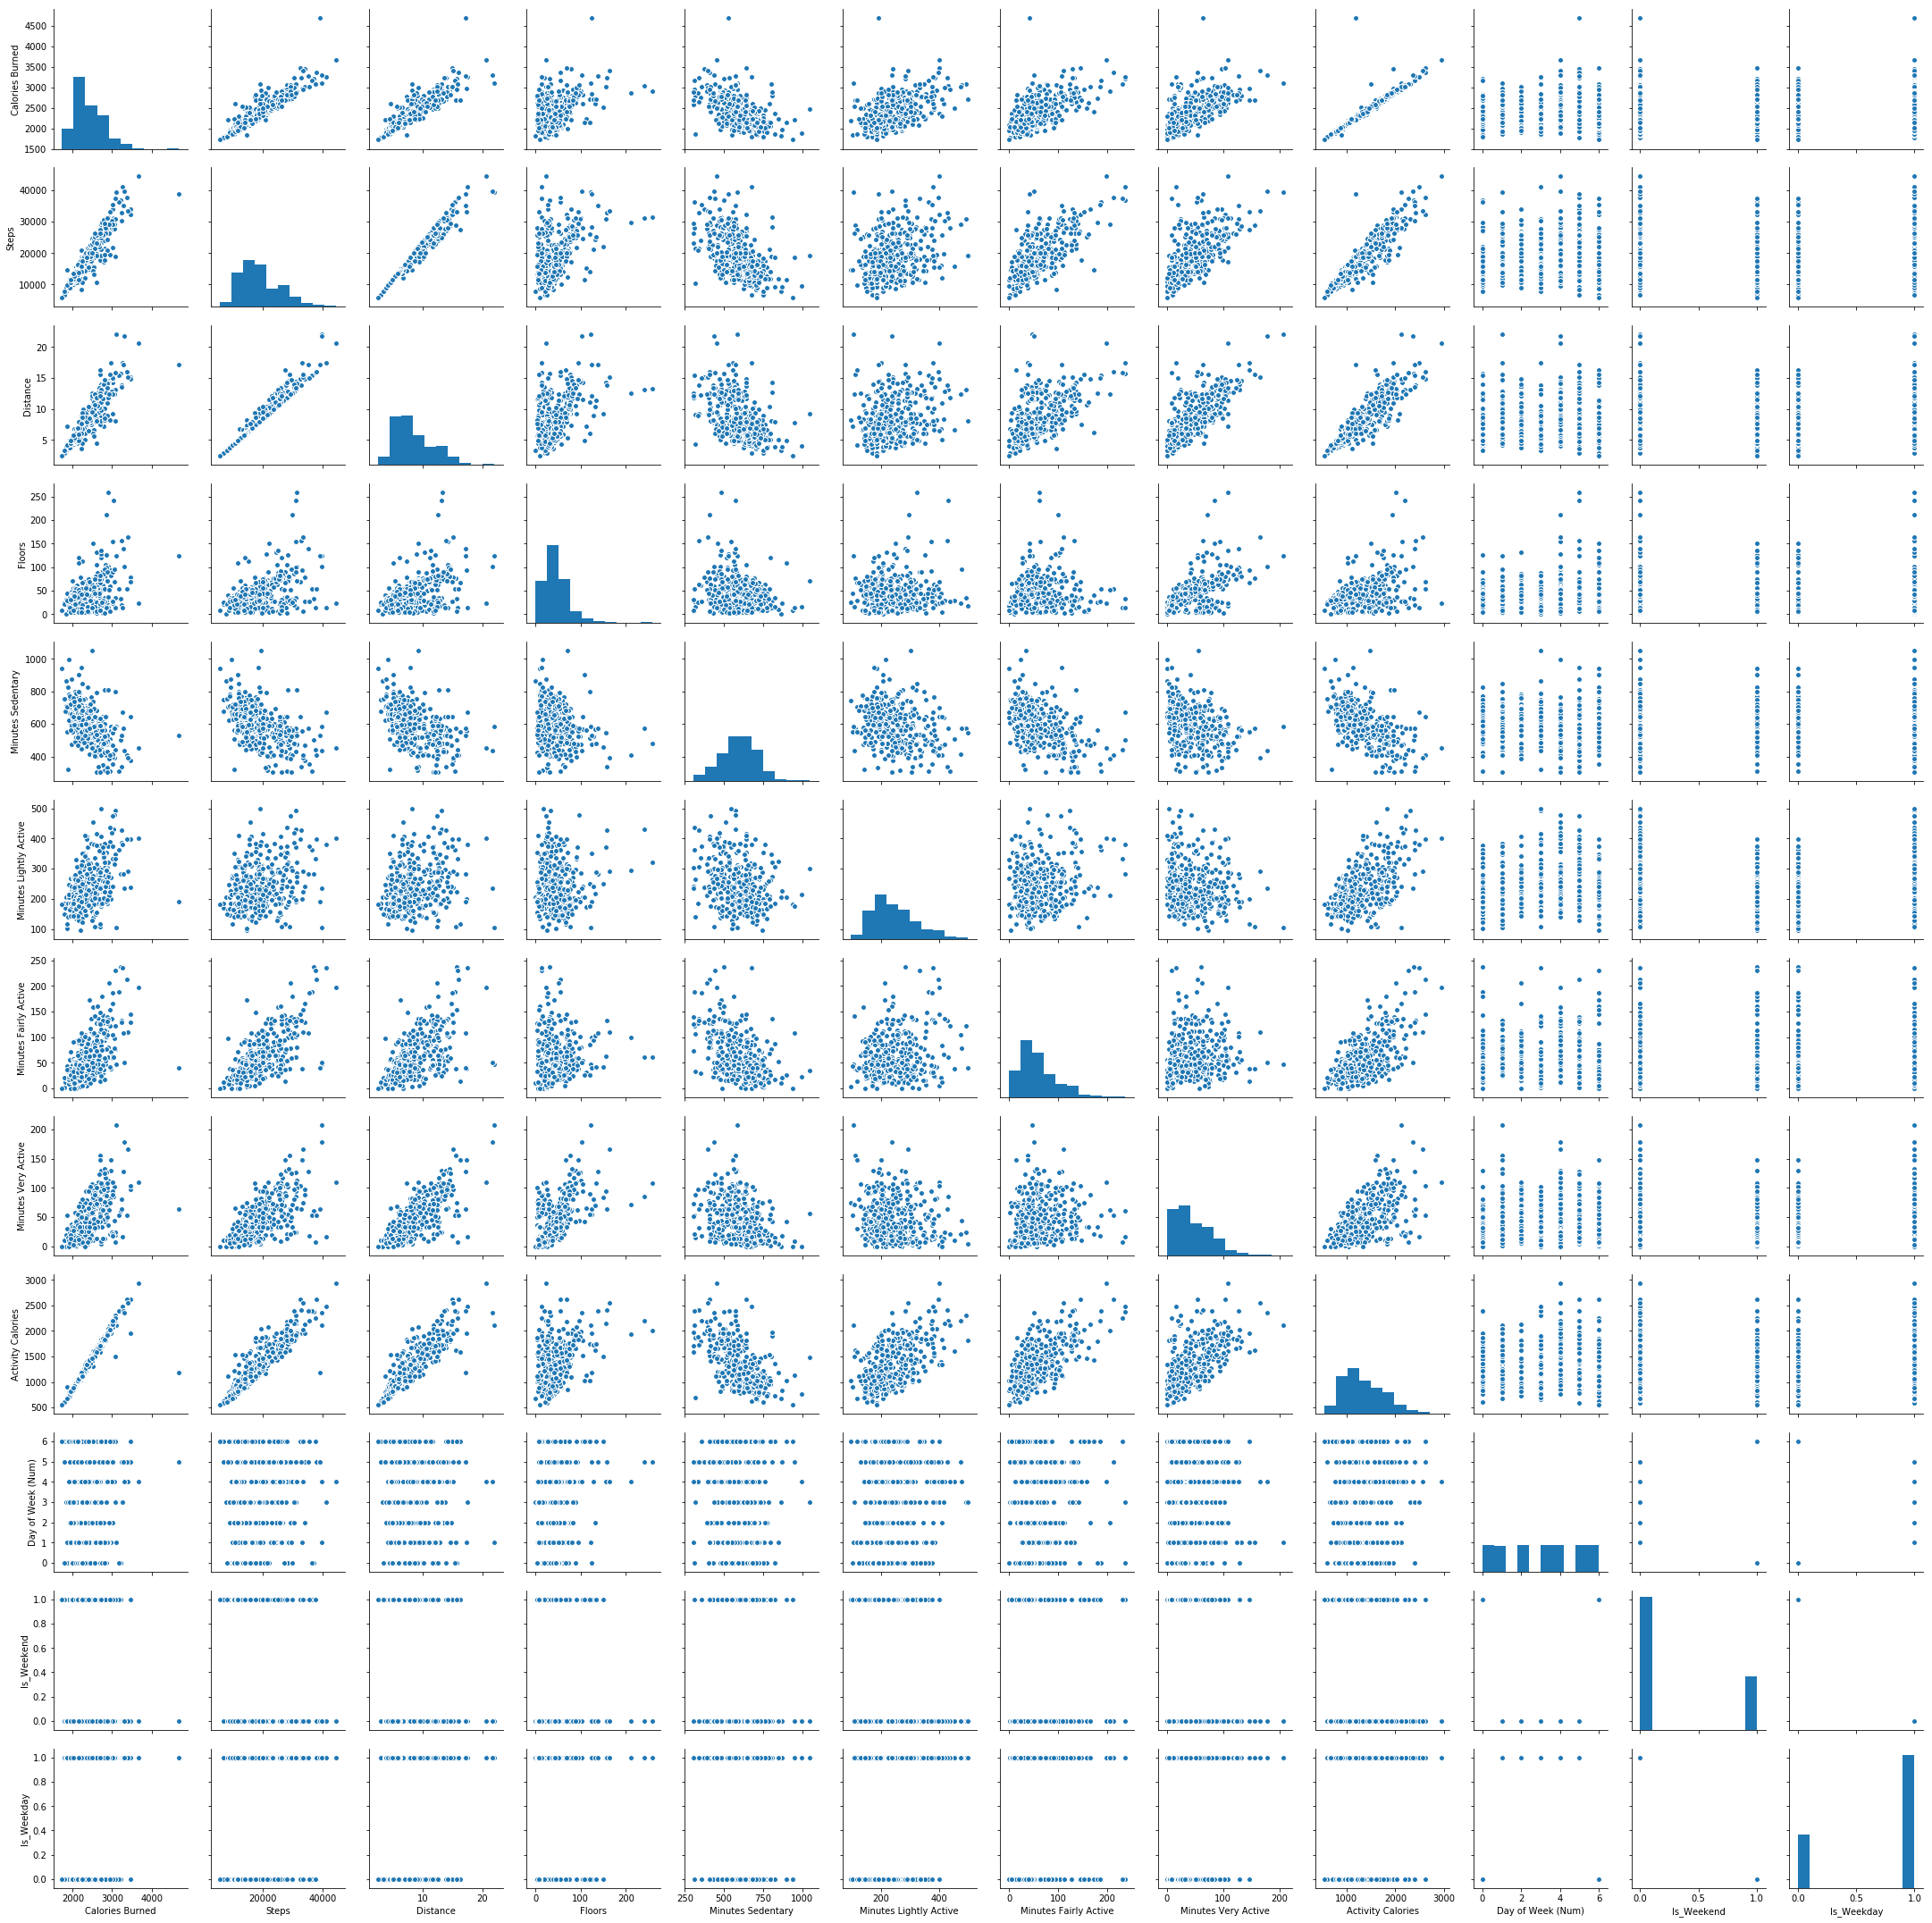

In [72]:
#correlation of all features
sns.pairplot(df)

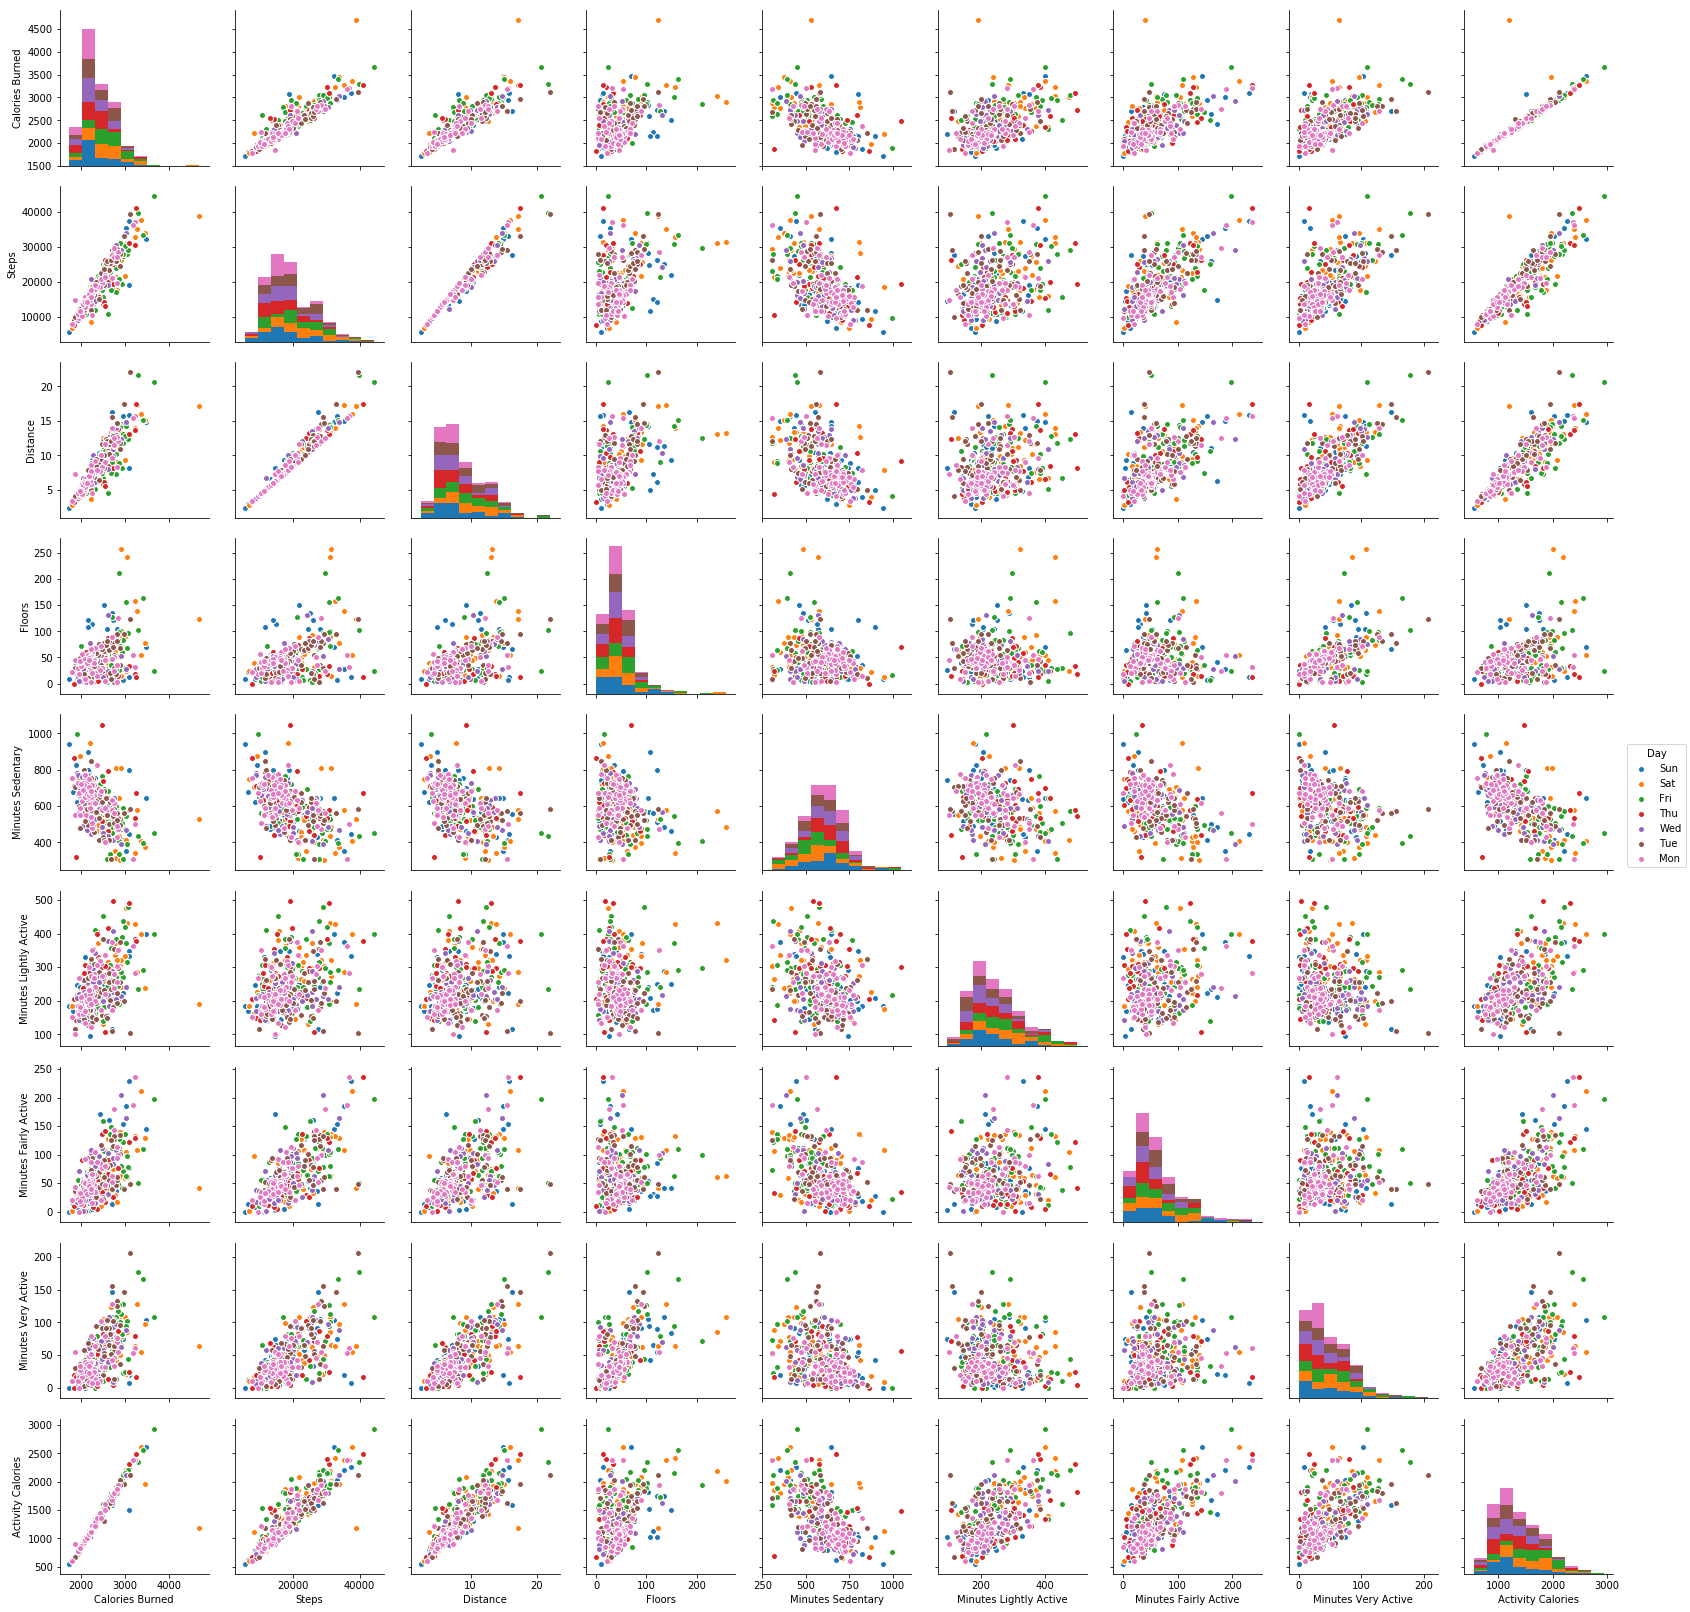

In [73]:
#excluding all categorical features besides day of the week
df_days = df.loc[:,"Date":"Day"].drop(["Day of Week (Num)"], axis = 1)
df_days
sns.pairplot(df_days, hue = "Day")

## Distribution of Activity by Day (Violin Plots)

In [58]:
days = ["Sun", "Mon", "Tue", "Wed", "Thurs", "Fri", "Sat"]
#Day of week vs. amount of sleep
#Day of week vs. amount of movement

#Day of week vs. calories burned
def day_calories(dataframe):
    day = dataframe["Day"]
    calories = dataframe["Calories Burned"]
    plt.figure(figsize=(10,6))
    ax = sns.violinplot(x = day, y = calories, palette = "Set2")
    ax.set_xticklabels(days, rotation='45', fontsize=14)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.set_title('Calories Burned vs. Day', fontdict={'fontsize': 20, 'fontweight': 'medium'})

#Day of week vs. minutes sedentary
def day_sedentary(dataframe):
    day = dataframe["Day"]
    sedentary = dataframe["Minutes Sedentary"]
    plt.figure(figsize=(10,6))
    ax = sns.violinplot(x = day, y = sedentary, palette = "Set2")
    ax.set_xticklabels(days, rotation='45', fontsize=14)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.set_title('Minutes Sedentary vs. Day', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#Day of week vs. minutes very active
def day_veryactive(dataframe):
    day = dataframe["Day"]
    veryactive = dataframe["Minutes Very Active"]
    plt.figure(figsize=(10,6))
    ax = sns.violinplot(x = day, y = veryactive, palette = "Set2")
    ax.set_xticklabels(days, rotation='45', fontsize=14)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.set_title('Minutes Very Active vs. Day', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#Day of week vs. floors
def day_floors(dataframe):
    day = dataframe["Day"]
    floors = dataframe["Floors"]
    plt.figure(figsize=(10,6))
    ax = sns.violinplot(x = day, y = floors, palette = "Set2")
    ax.set_xticklabels(days, rotation='45', fontsize=14)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.set_title('Floors Climbed vs. Day', fontdict={'fontsize': 20, 'fontweight': 'medium'})

/srv/app/venv/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/srv/app/venv/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


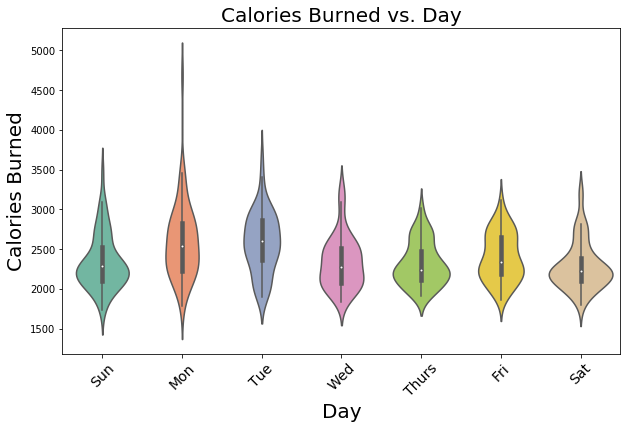

In [15]:
day_calories(df)

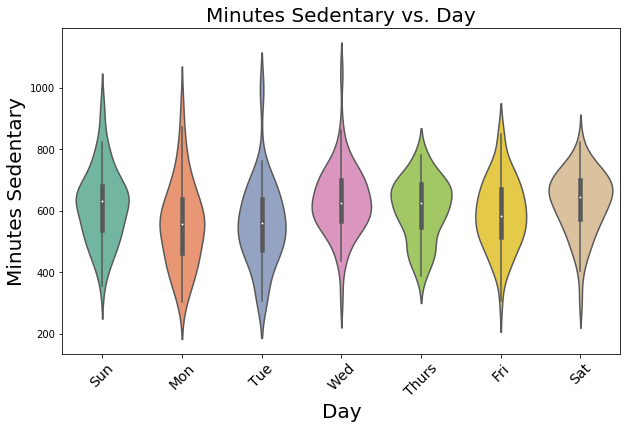

In [16]:
day_sedentary(df)

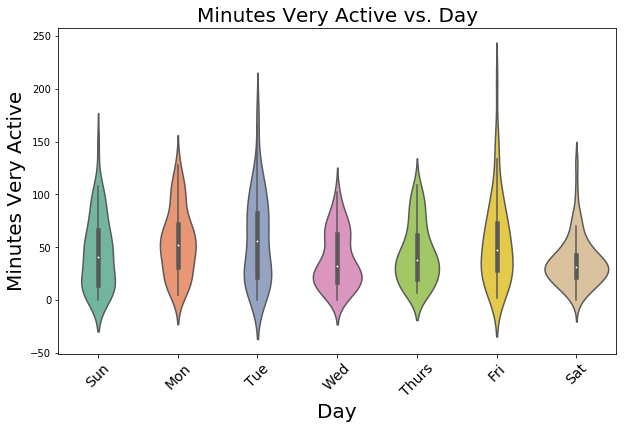

In [59]:
day_veryactive(df)

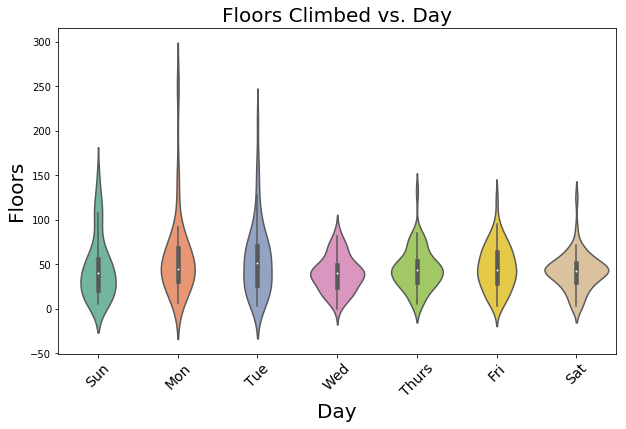

In [17]:
day_floors(df)

## Trend of Activity

In [18]:
#trends of activity
def activity(dataframe):
    month = dataframe["Month"]
    day = dataframe["Date"]
    light = dataframe["Minutes Lightly Active"]
    fairly = dataframe["Minutes Fairly Active"]
    very = dataframe["Minutes Very Active"]
    plt.figure(figsize=(45,20))
    plt.plot(day, light)
    plt.plot(day, fairly)
    plt.plot(day, very)
   #ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in dataframe.Month]
    #ax.set_xticks(np.arange(1,13))
    #ax.set_xticklabels(ticklabels)
    
    import matplotlib.dates as mdates
    X = plt.gca().xaxis
    # Set the locator
    locator = mdates.MonthLocator()  # every month
    # Specify the format - %b gives us Jan, Feb...
    fmt = mdates.DateFormatter('%b')
    X.set_major_locator(locator)
    # Specify formatter
    X.set_major_formatter(fmt)
    plt.show()

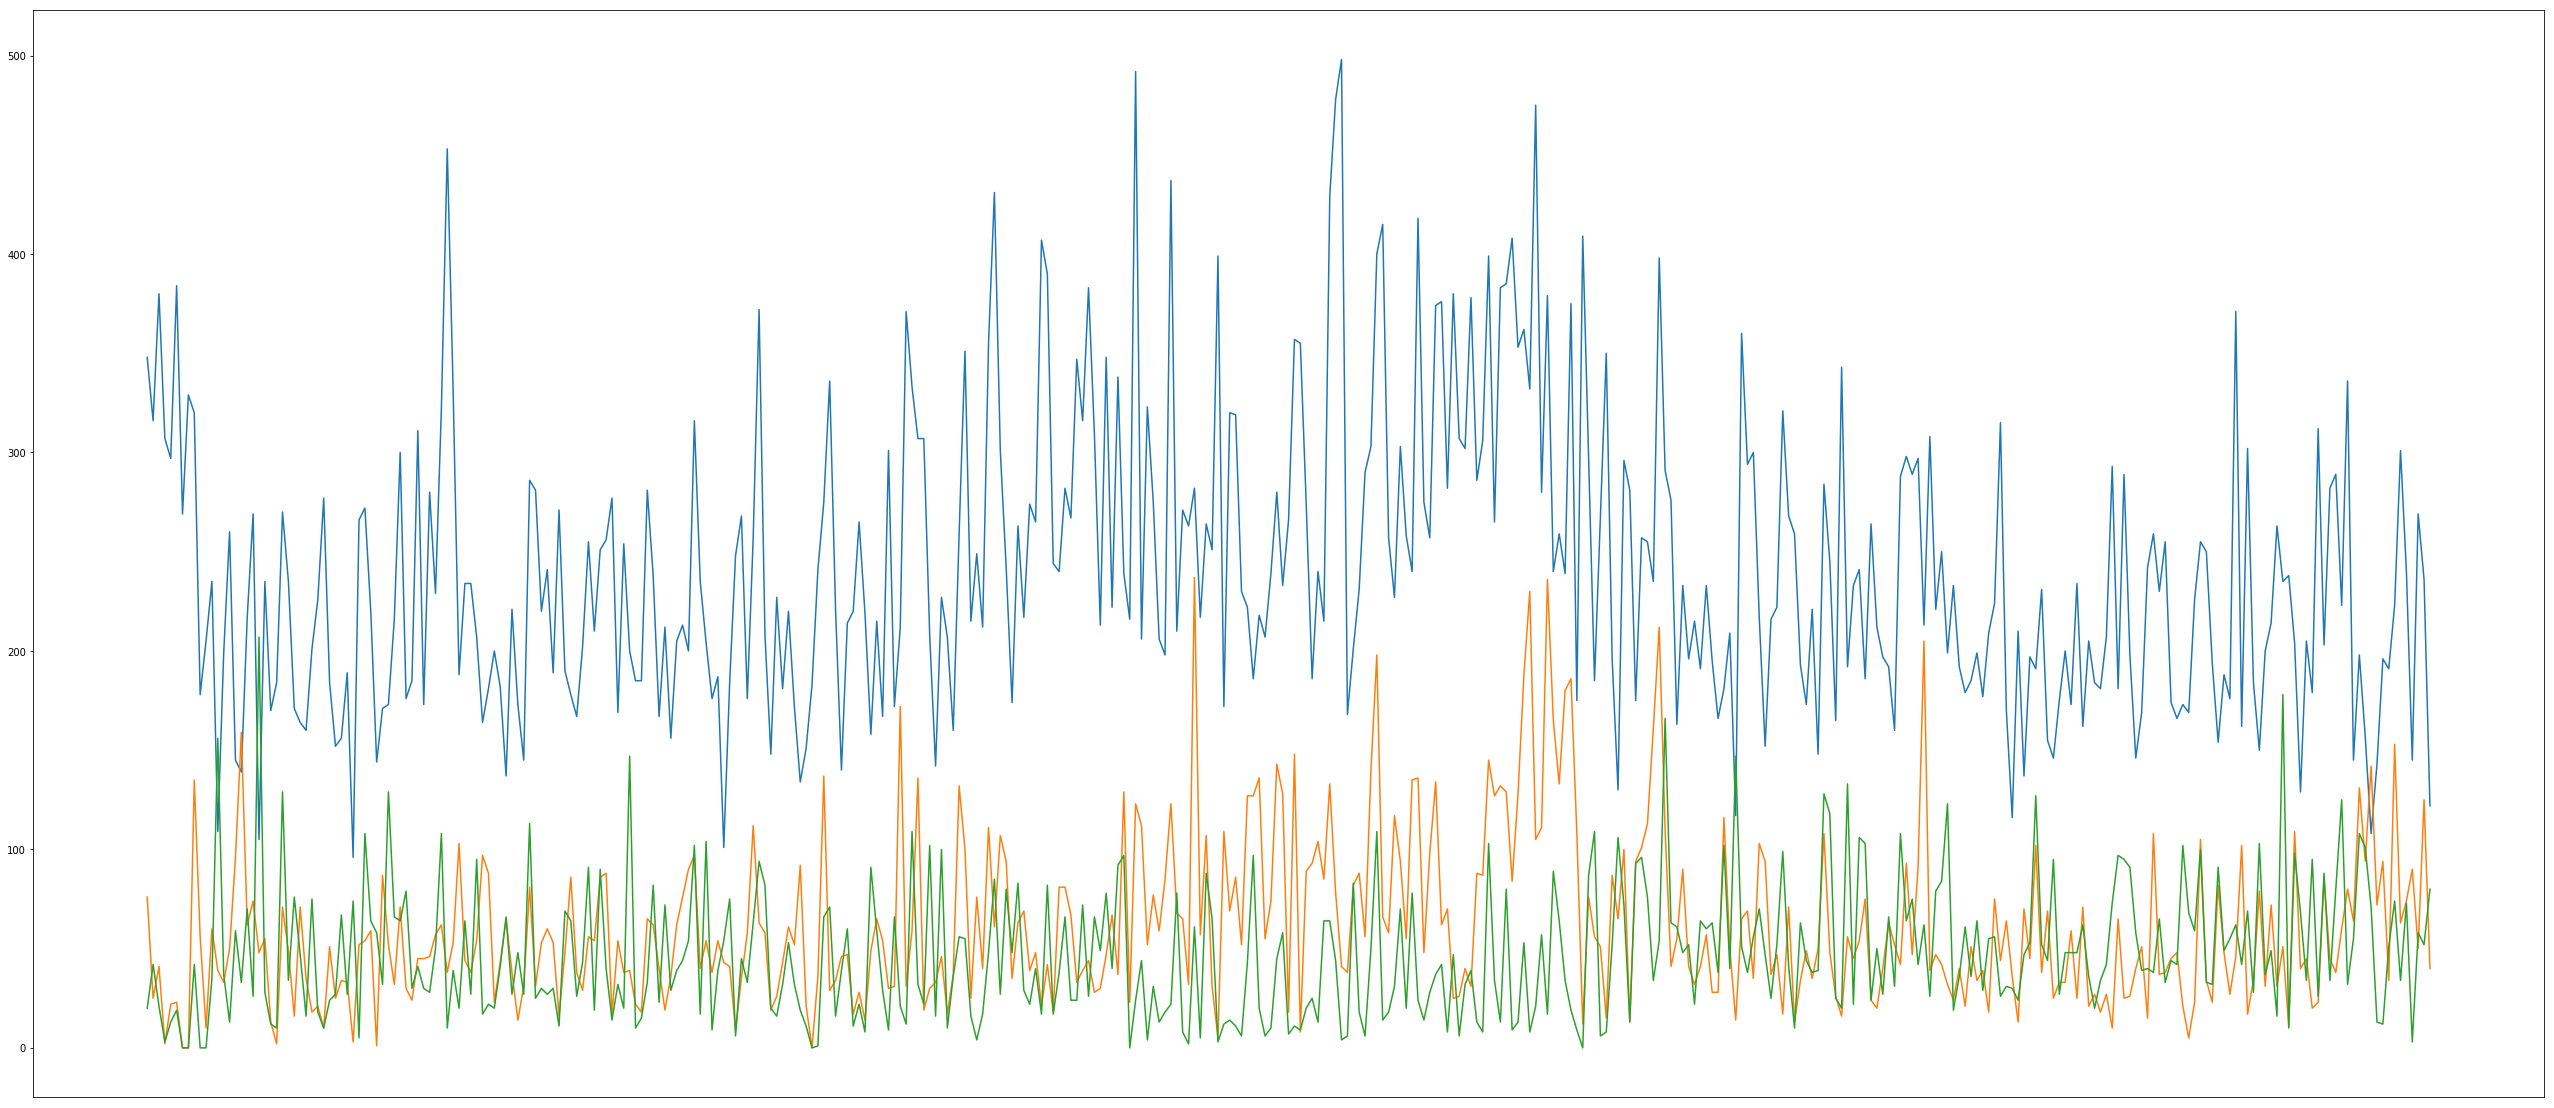

In [19]:
activity(df)

In [20]:
df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Day of Week (Num),Day,Month,Is_Weekend,Is_Weekday
152,12-31-2017,3081,18965,8.13,12,800,348,76,20,1503,6,Sun,Dec,1,0
151,12-30-2017,2397,17800,8.43,45,525,316,25,42,1384,5,Sat,Dec,0,1
150,12-29-2017,2464,17627,7.46,63,763,380,41,21,1500,4,Fri,Dec,0,1
149,12-28-2017,2094,11593,4.91,12,608,307,2,3,1017,3,Thu,Dec,0,1
148,12-27-2017,2266,13747,5.82,40,662,297,22,13,1208,2,Wed,Dec,0,1


In [74]:
#average values, group by month
df_grouped_month = df.groupby("Month").agg(np.mean).iloc[:,0:9].reset_index()
df_grouped_month

,Month,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,Apr,2404.700000,19141.600000,8.828667,62.066667,630.800000,229.066667,48.400000,60.700000,1353.300000
1,Aug,2470.161290,19295.709677,8.579677,45.516129,576.096774,284.322581,61.258065,42.967742,1442.935484
2,Dec,2293.774194,16841.354839,7.678387,37.806452,655.193548,235.612903,44.258065,40.354839,1208.451613
3,Feb,2306.642857,17697.035714,8.077857,58.607143,640.285714,214.250000,40.500000,57.464286,1233.821429
4,Jan,2424.064516,20981.870968,9.664839,43.096774,558.903226,210.322581,67.096774,60.838710,1379.290323
5,Jul,2461.774194,18832.161290,8.073871,30.741935,594.161290,273.870968,85.032258,29.677419,1447.419355
6,Jun,2715.733333,24105.133333,10.425333,29.133333,538.333333,332.866667,102.900000,35.966667,1779.733333
7,Mar,2311.580645,18000.741935,8.114194,52.451613,601.516129,209.193548,52.419355,53.967742,1242.838710
8,May,2657.870968,23395.774194,10.275161,49.548387,548.225806,249.645161,90.419355,57.322581,1590.258065
9,Nov,2300.100000,17146.966667,7.662000,51.066667,612.833333,219.633333,48.133333,48.866667,1231.900000


## Average Activity by Month

In [75]:
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
#average calories per month
def month_cal(df):
    plt.title("Month vs. Calories Burned")
    ax = sns.barplot(x = "Month", y = "Calories Burned", data = df)
    plt.figure(figsize = (10, 6))
    ax.set_xticklabels(month, rotation='45', fontsize=10)

/srv/app/venv/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


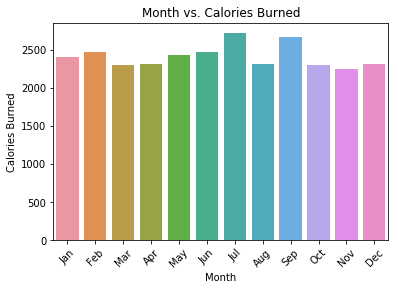

<Figure size 720x432 with 0 Axes>

In [23]:
month_cal(df_grouped_month)

In [76]:
#average distance traveled by month
def month_dist(df):
    plt.title("Month vs. Distance Traveled")
    ax = sns.barplot(x = "Month", y = "Distance", data = df)
    plt.figure(figsize = (10, 6))
    ax.set_xticklabels(month, rotation='45', fontsize=10)

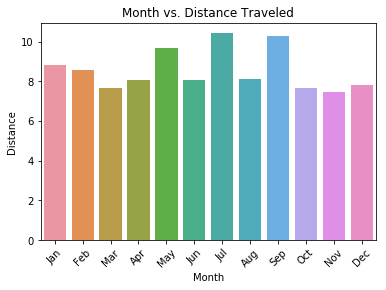

<Figure size 720x432 with 0 Axes>

In [25]:
month_dist(df_grouped_month)

In [78]:
#average of very active minutes by month
def month_veryactive(df):
    plt.title("Month vs. Minutes Very Active")
    ax = sns.barplot(x = "Month", y = "Minutes Very Active", data = df)
    plt.figure(figsize = (10, 6))
    ax.set_xticklabels(month, rotation='45', fontsize=10)

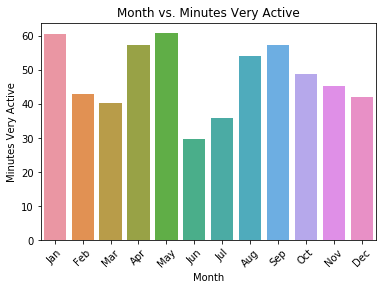

<Figure size 720x432 with 0 Axes>

In [29]:
month_veryactive(df_grouped_month)

## Average Activity Weekday vs. Weekend

In [79]:
#average values grouped by weekend or weekdays
df_grouped_wkend = df.groupby("Is_Weekend").agg(np.mean)
df_grouped_wkend

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Day of Week (Num),Is_Weekday
Is_Weekend,,,,,,,,,,,
0,2446.746667,19644.433333,8.793667,48.880000,588.000000,250.040000,62.930000,49.873333,1406.056667,3.01,1.0
1,2312.850000,17635.683333,7.811000,44.108333,622.008333,231.283333,58.183333,40.550000,1251.966667,3.00,0.0


In [83]:
wkend = ["Weekend", "Weekday"]
#average calories burned on the weekend vs weekday
def wkend_cal(df):
    plt.title("Calories Burned on the Weekend vs. Weekday")
    ax = sns.barplot(x = "Is_Weekday", y = "Calories Burned", data = df)
    plt.figure(figsize = (10, 6))
    ax.set_xticklabels(wkend, rotation='45', fontsize=10)

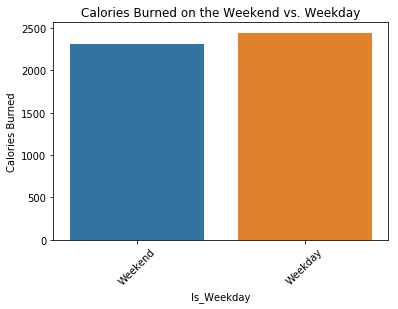

<Figure size 720x432 with 0 Axes>

In [51]:
wkend_cal(df_grouped_wkend)

In [84]:
#average distance traveled on weekend vs weekday
def wkend_dist(df):
    plt.title("Distance Traveled on the Weekend vs. Weekday")
    ax = sns.barplot(x = "Is_Weekday", y = "Distance", data = df)
    plt.figure(figsize = (10, 6))
    ax.set_xticklabels(wkend, rotation='45', fontsize=10)

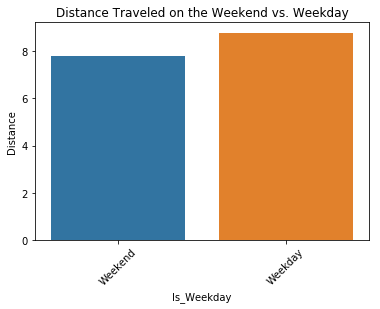

<Figure size 720x432 with 0 Axes>

In [55]:
wkend_dist(df_grouped_wkend)

In [86]:
#average distance traveled on weekend vs weekday
def wkend_minveryactive(df):
    plt.title("Minutes Very Active on the Weekend vs. Weekday")
    ax = sns.barplot(x = "Is_Weekday", y = "Minutes Very Active", data = df)
    plt.figure(figsize = (10, 6))
    ax.set_xticklabels(wkend, rotation='45', fontsize=10)

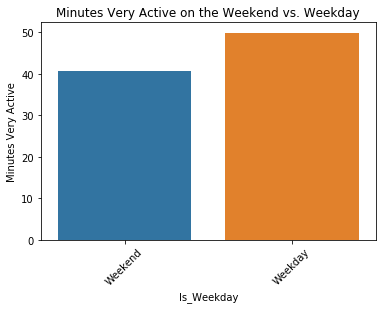

<Figure size 720x432 with 0 Axes>

In [87]:
wkend_dist(df_grouped_wkend)